In [310]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [311]:
df = pd.read_csv("../Data/cleaned_df.csv", index_col=0)

In [312]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052


## Univariate Analysis

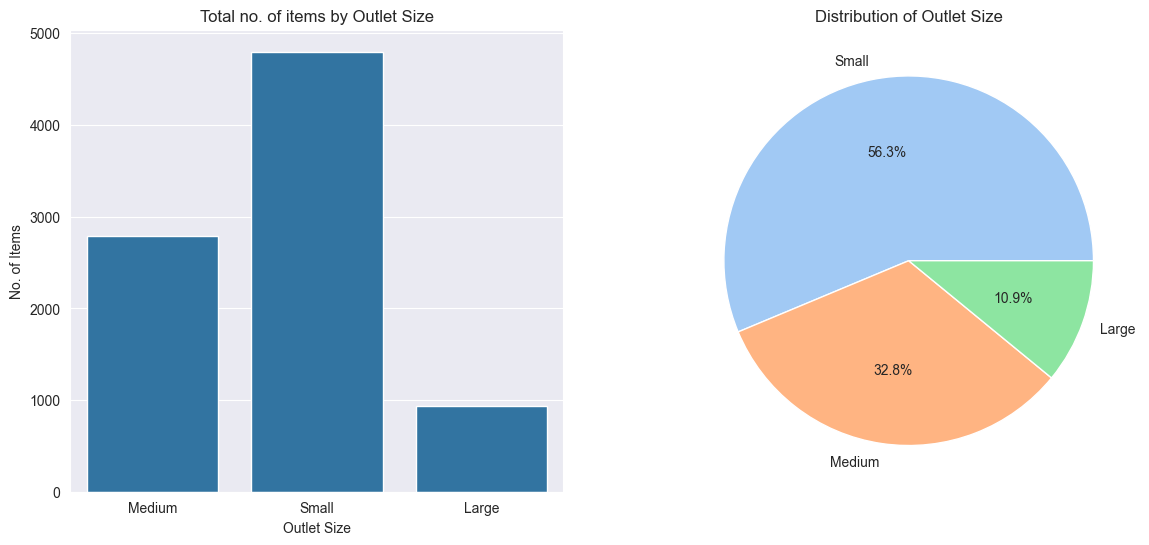

In [313]:
# Outlet_Size

# Create a figure with 2 subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Countplot for Outlet Size
sns.countplot(x='Outlet_Size', data=df, ax=axes[0])
axes[0].set_title('Total no. of items by Outlet Size')
axes[0].set_xlabel('Outlet Size')
axes[0].set_ylabel('No. of Items')

# Plot pie chart
axes[1].pie(df['Outlet_Size'].value_counts(), 
             labels=df['Outlet_Size'].value_counts().index, 
             autopct='%1.1f%%',  
             colors=sns.color_palette('pastel'))
axes[1].set_title('Distribution of Outlet Size')

# Show the plots
plt.show()


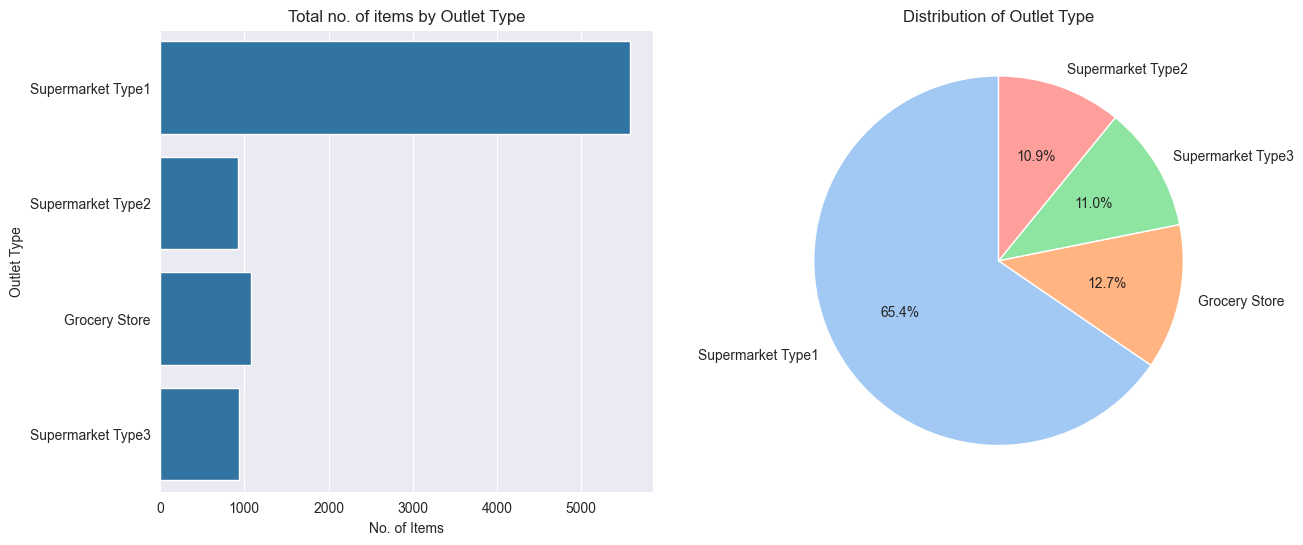

In [314]:
# Outlet_Type

# Create a figure with 2 subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Countplot for Outlet Type
sns.countplot(y='Outlet_Type', data=df, ax=axes[0])
axes[0].set_title('Total no. of items by Outlet Type')
axes[0].set_ylabel('Outlet Type')
axes[0].set_xlabel('No. of Items')

# Plot pie chart using value_counts()
axes[1].pie(df['Outlet_Type'].value_counts(), 
             labels=df['Outlet_Type'].value_counts().index, 
             autopct='%1.1f%%', 
             startangle=90, 
             colors=sns.color_palette('pastel'))

axes[1].set_title('Distribution of Outlet Type')

plt.show()


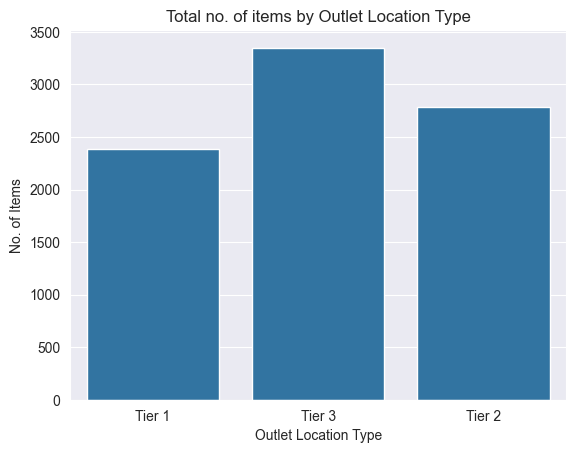

In [315]:
# Outlet_Location_Type

sns.countplot(x='Outlet_Location_Type', data=df)

plt.title('Total no. of items by Outlet Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('No. of Items')

plt.show()

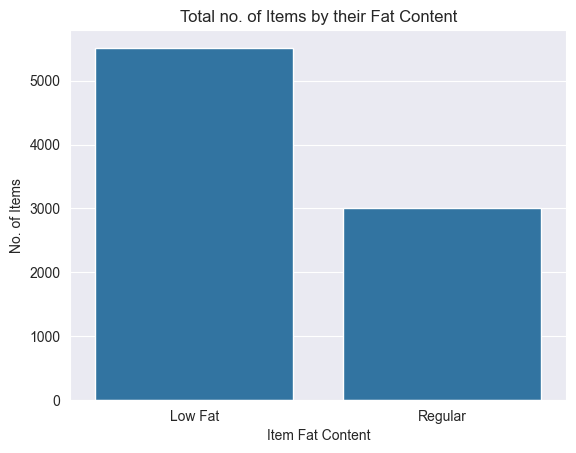

In [316]:
# Item_Fat_Content

sns.countplot(x='Item_Fat_Content', data=df)

plt.title('Total no. of Items by their Fat Content')
plt.xlabel('Item Fat Content')
plt.ylabel('No. of Items')

plt.show()

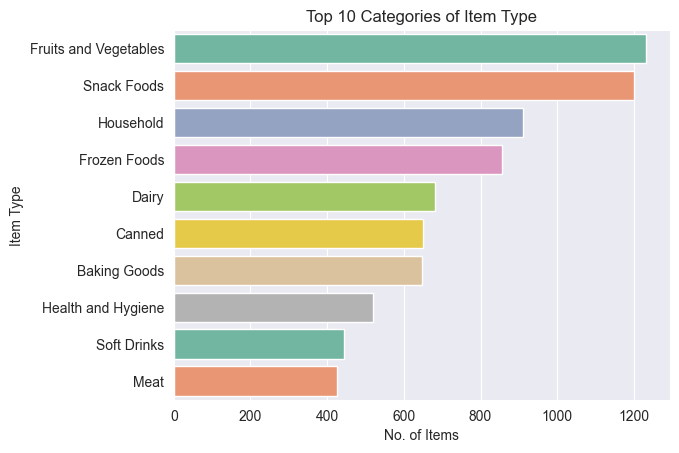

In [317]:
# Item_Type

top_10 = df['Item_Type'].value_counts().nlargest(10).index

sns.countplot(y='Item_Type', data=df, order=top_10, palette='Set2')

plt.title('Top 10 Categories of Item Type')
plt.xlabel('No. of Items')
plt.ylabel('Item Type')

plt.show()

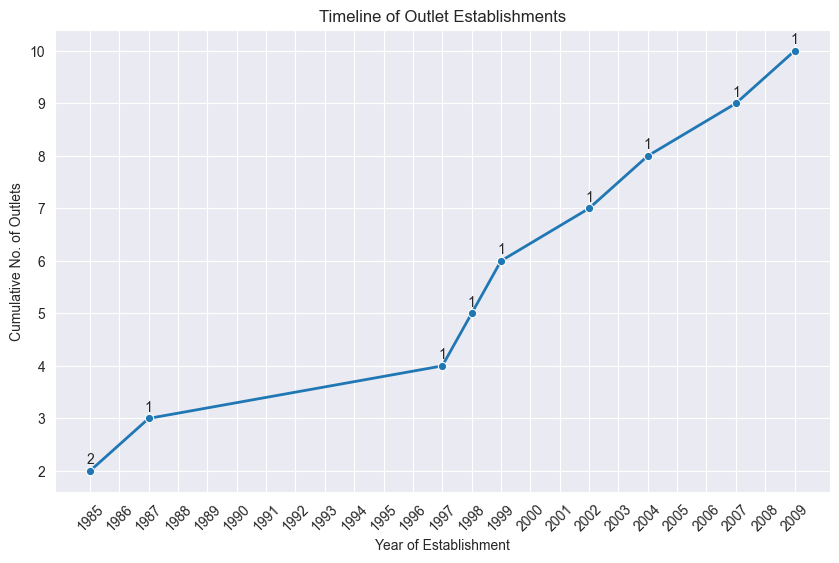

In [318]:
# Outlet_Establishment_Year

# Step 1: Sort the data by establishment year and outlet identifier to ensure correct order
df_sorted = df.sort_values(by=['Outlet_Establishment_Year', 'Outlet_Identifier'])

# Step 2: Create a new DataFrame for counting unique outlets
outlet_counts = df_sorted.groupby('Outlet_Establishment_Year')['Outlet_Identifier'].nunique().reset_index()
outlet_counts.columns = ['Outlet_Establishment_Year', 'Unique_Outlets']

# Step 3: Calculate the cumulative count of unique outlets established over the years
outlet_counts['Cumulative_Outlets'] = outlet_counts['Unique_Outlets'].cumsum()

# Step 4: Plot the timeline graph using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Outlet_Establishment_Year', y='Cumulative_Outlets', data=outlet_counts, marker='o', linewidth=2)

# Step 5: Customize the graph
plt.title('Timeline of Outlet Establishments')
plt.xlabel('Year of Establishment')
plt.ylabel('Cumulative No. of Outlets')

# Step 6: Customize x-axis ticks to show more years
plt.xticks(ticks=range(outlet_counts['Outlet_Establishment_Year'].min(), outlet_counts['Outlet_Establishment_Year'].max() + 1, 1), rotation=45)

# Step 7: Annotate the cumulative outlets established each year
for index, row in outlet_counts.iterrows():
    # Use the cumulative total for annotation
    plt.annotate(f'{row["Unique_Outlets"]}', 
                 xy=(row['Outlet_Establishment_Year'], row['Cumulative_Outlets']), 
                 xytext=(0, 5),  # Offset the annotation vertically
                 textcoords='offset points', 
                 ha='center', 
                 fontsize=10)

plt.grid(True)
# Display the plot
plt.show()

In [319]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052


In [320]:
# plt.figure(figsize=(18,8))
# df['Item_MRP'].hist(bins=100)
# x=np.arange(30,270,5)
# plt.xticks(x)

sns.set_style('darkgrid')
fig = px.histogram(df, x='Item_MRP', nbins=500)

fig.update_xaxes(showgrid=True, dtick=10)

fig.update_layout(
    title={
        'text': 'Distribution of Item MRP',
        'x': 0.5,  # Center the title
    },
    xaxis_title='Item MRP',
    yaxis_title='No. of Items'
)

fig.show()

#0-69, 70-135, 136-202, 203-270

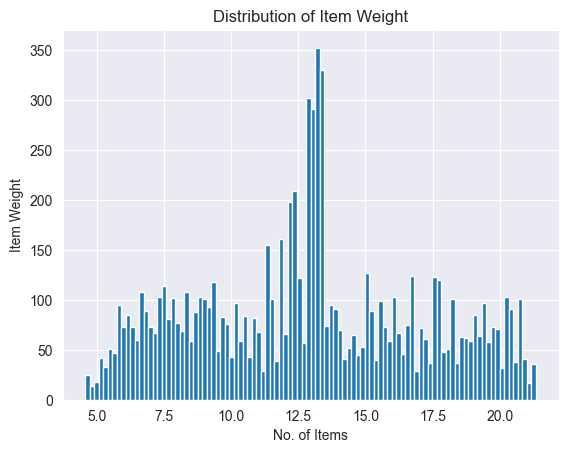

In [321]:
df['Item_Weight'].hist(bins=100)

plt.title('Distribution of Item Weight')
plt.xlabel('No. of Items')
plt.ylabel('Item Weight')

plt.show()

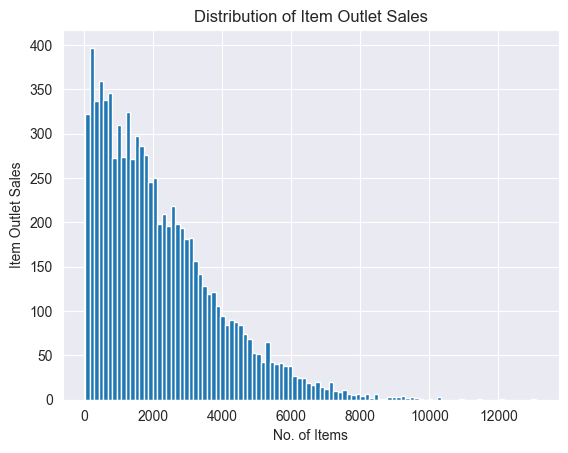

In [322]:
df['Item_Outlet_Sales'].hist(bins=100)
# top 10 item by outlet sale and least 10 

plt.title('Distribution of Item Outlet Sales')
plt.xlabel('No. of Items')
plt.ylabel('Item Outlet Sales')

plt.show()

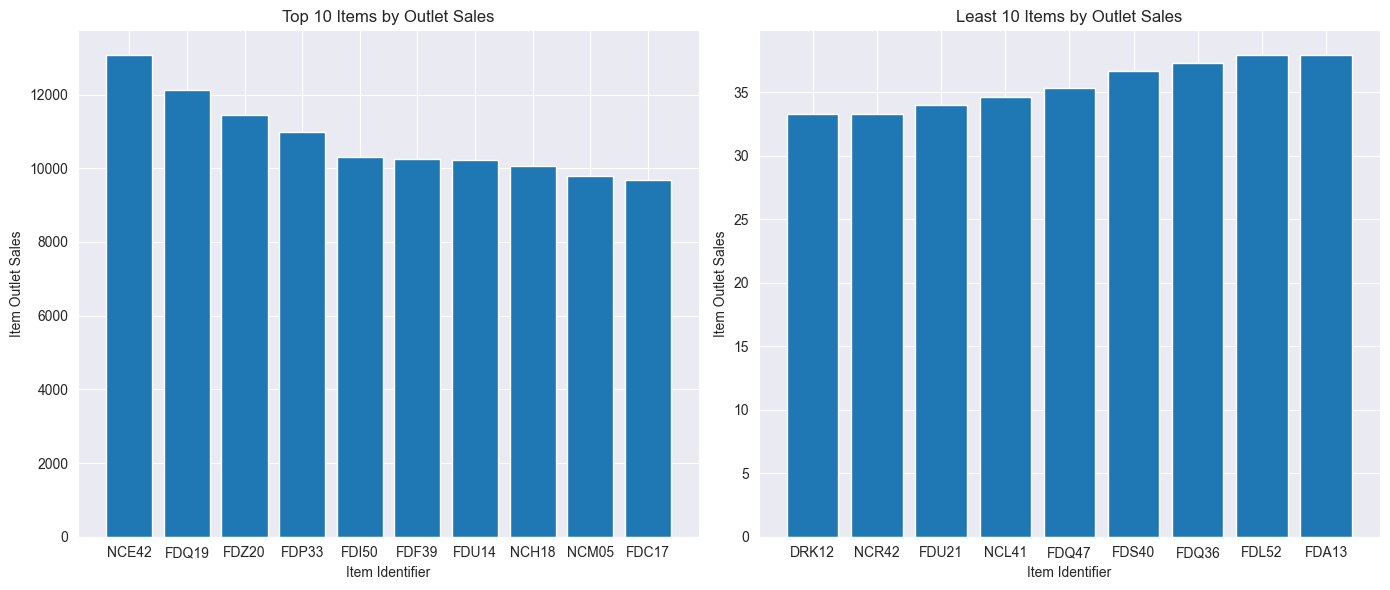

In [323]:

# Find the top 10 and least 10 items by outlet sales
top_10_items = df.sort_values(by='Item_Outlet_Sales', ascending=False).head(10)
least_10_items = df.sort_values(by='Item_Outlet_Sales', ascending=True).head(10)

# Create a figure with 2 subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for top 10 items
axes[0].bar(top_10_items['Item_Identifier'], top_10_items['Item_Outlet_Sales'])
axes[0].set_title('Top 10 Items by Outlet Sales')
axes[0].set_xlabel('Item Identifier')
axes[0].set_ylabel('Item Outlet Sales')

# Plot for least 10 items
axes[1].bar(least_10_items['Item_Identifier'], least_10_items['Item_Outlet_Sales'])
axes[1].set_title('Least 10 Items by Outlet Sales')
axes[1].set_xlabel('Item Identifier')
axes[1].set_ylabel('Item Outlet Sales')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


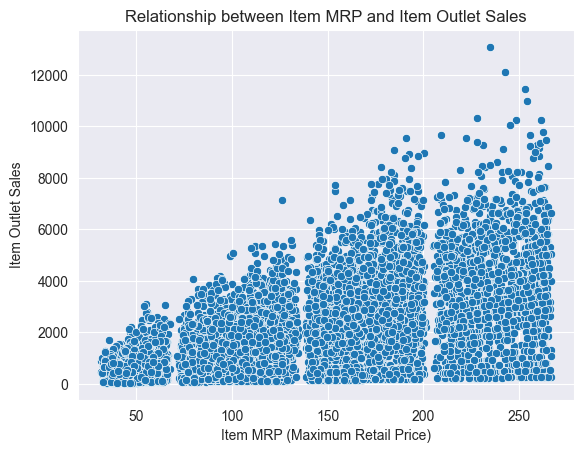

In [324]:
# Item_MRP vs Item_Outlet_Sales

sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df)

plt.title('Relationship between Item MRP and Item Outlet Sales')
plt.xlabel('Item MRP (Maximum Retail Price)')
plt.ylabel('Item Outlet Sales')

plt.show()

In [325]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052


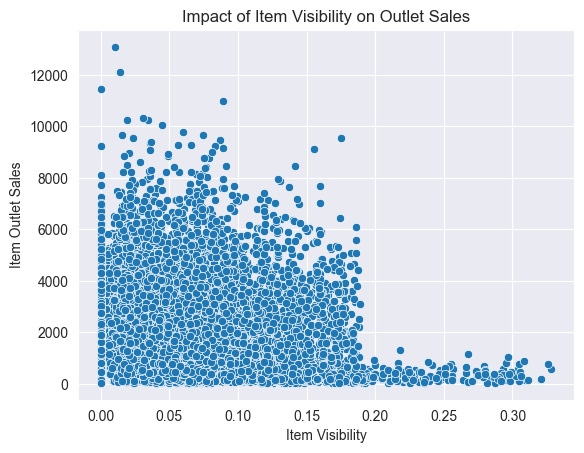

In [326]:
# Item_Visibility vs Item_Outlet_Sales

sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=df)

plt.title('Impact of Item Visibility on Outlet Sales')
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')

plt.show()

In [327]:
df['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [328]:
df[df['Item_Visibility']==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20000,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93000,Low Fat,0.0,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.39500,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.80000,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.70000,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
...,...,...,...,...,...,...,...,...,...,...,...,...
8480,FDQ58,12.98788,Low Fat,0.0,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8484,DRJ49,6.86500,Low Fat,0.0,Soft Drinks,129.9652,OUT013,1987,Large,Tier 3,Supermarket Type1,2324.9736
8486,FDR20,20.00000,Regular,0.0,Fruits and Vegetables,46.4744,OUT010,1998,Small,Tier 3,Grocery Store,45.2744
8494,NCI54,15.20000,Low Fat,0.0,Household,110.4912,OUT017,2007,Small,Tier 2,Supermarket Type1,1637.8680


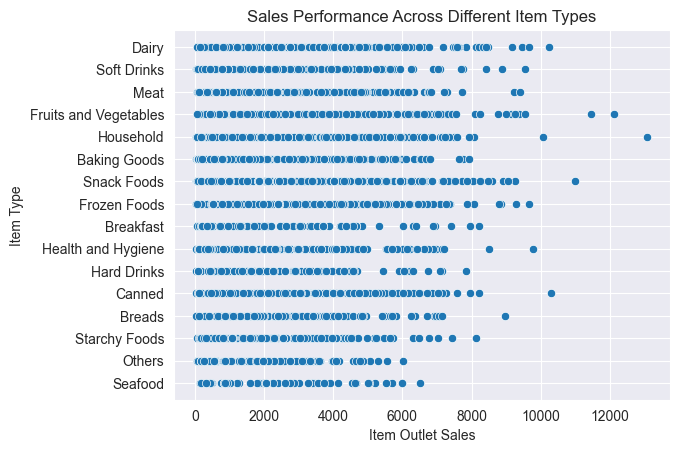

In [329]:
# Item_Type vs Item_Outlet_Sales

sns.scatterplot(y='Item_Type', x='Item_Outlet_Sales', data=df)

plt.title('Sales Performance Across Different Item Types')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Item Type')

plt.show()

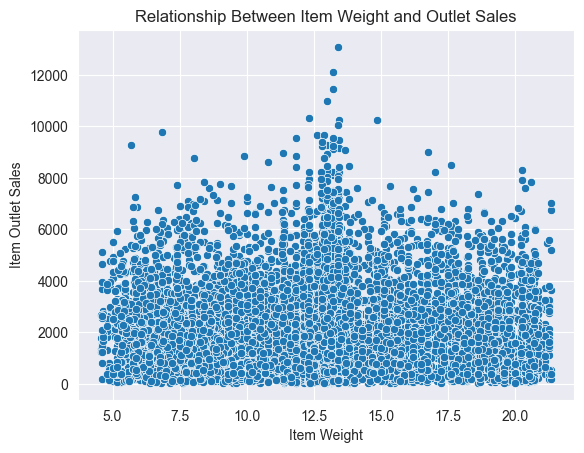

In [330]:
# Item_Weight vs Item_Outlet_Sales

sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=df)

plt.title('Relationship Between Item Weight and Outlet Sales')
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')

plt.show()

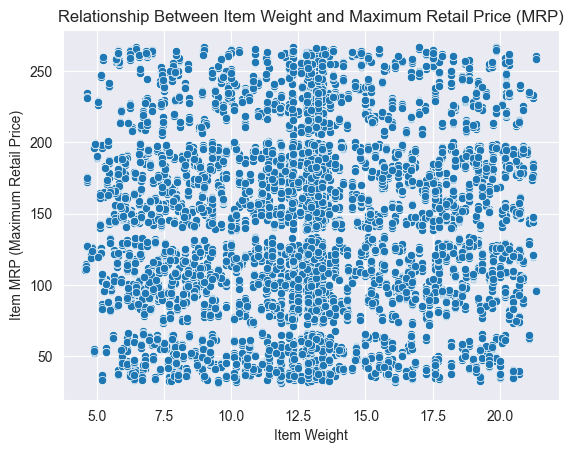

In [331]:
# Item_Weight vs Item_MRP

sns.scatterplot(x='Item_Weight', y='Item_MRP', data=df)

plt.title('Relationship Between Item Weight and Maximum Retail Price (MRP)')
plt.xlabel('Item Weight')
plt.ylabel('Item MRP (Maximum Retail Price)')

plt.show()

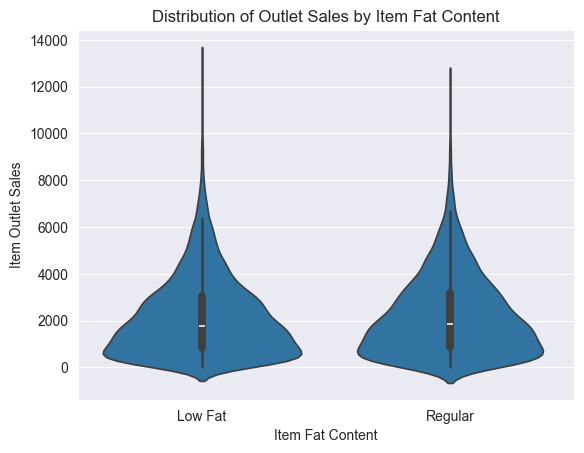

In [332]:
# Item_Fat_Content vs Item_Outlet_Sales

sns.violinplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)

plt.title('Distribution of Outlet Sales by Item Fat Content')
plt.xlabel('Item Fat Content')
plt.ylabel('Item Outlet Sales')

plt.show()

In [333]:
df.groupby('Outlet_Size')['Outlet_Identifier'].agg({'unique', 'count'})

,unique,count
Outlet_Size,,
Large,[OUT013],932
Medium,"[OUT049, OUT018, OUT027]",2793
Small,"[OUT010, OUT045, OUT017, OUT046, OUT035, OUT019]",4798


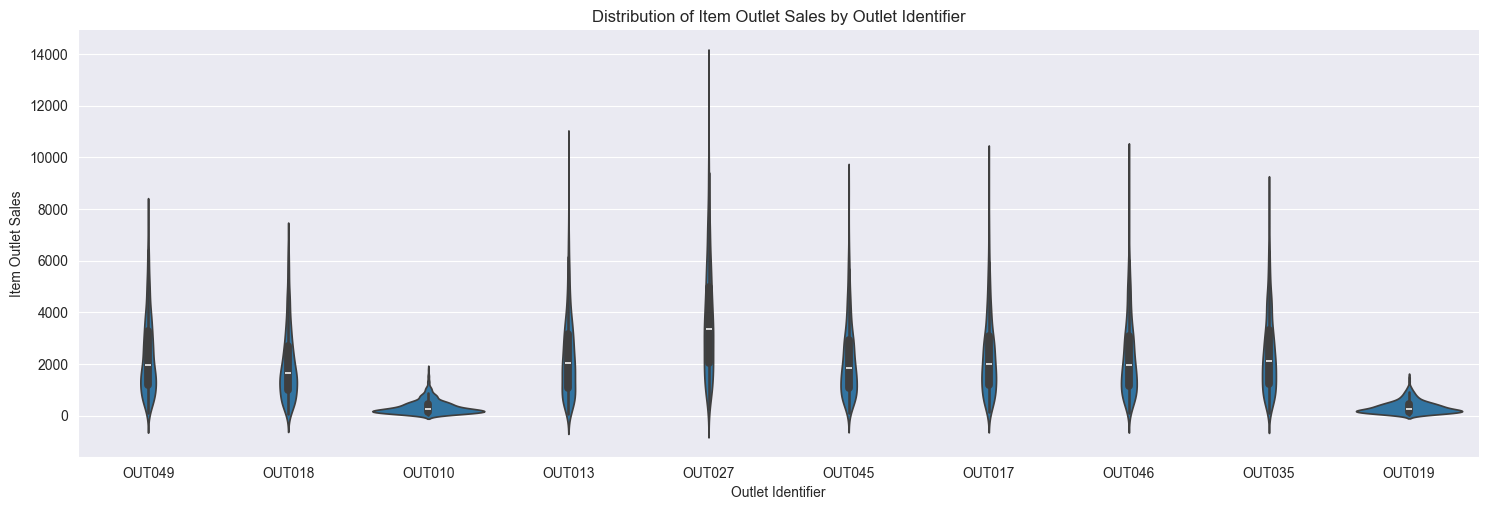

In [334]:
# Outlet_Identifier vs Item_Outlet_Sales

sns.catplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=df, kind='violin', aspect=3)

plt.title('Distribution of Item Outlet Sales by Outlet Identifier', loc='center')
plt.xlabel('Outlet Identifier')
plt.ylabel('Item Outlet Sales')

plt.show()

In [335]:
pd.set_option('display.max_colwidth', None)

df.groupby('Outlet_Size')['Outlet_Type'].agg({'unique', 'count'})

,unique,count
Outlet_Size,,
Large,[Supermarket Type1],932
Medium,"[Supermarket Type1, Supermarket Type2, Supermarket Type3]",2793
Small,"[Grocery Store, Supermarket Type1]",4798


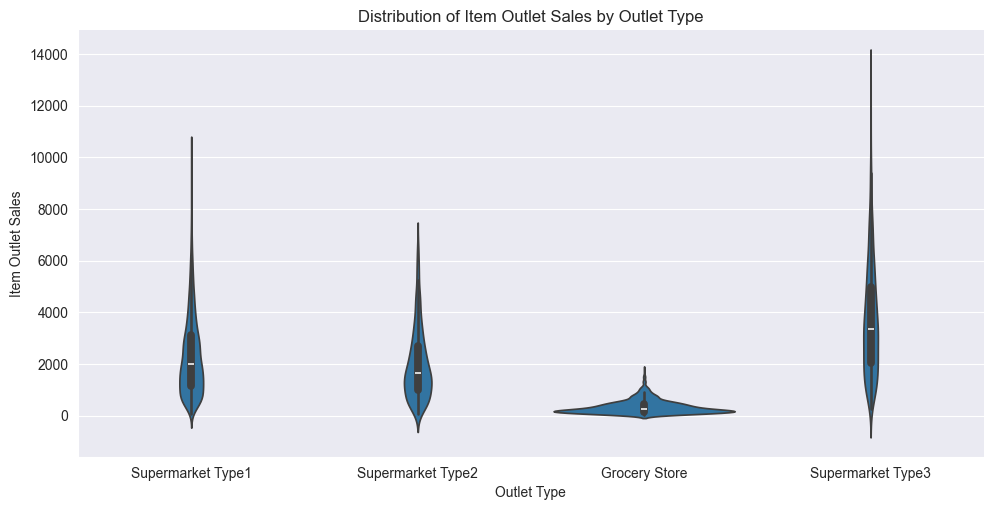

In [336]:
# Outlet_Type vs Item_Outlet_Sales

sns.catplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df, kind='violin', aspect=2)

plt.title('Distribution of Item Outlet Sales by Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')

plt.show()

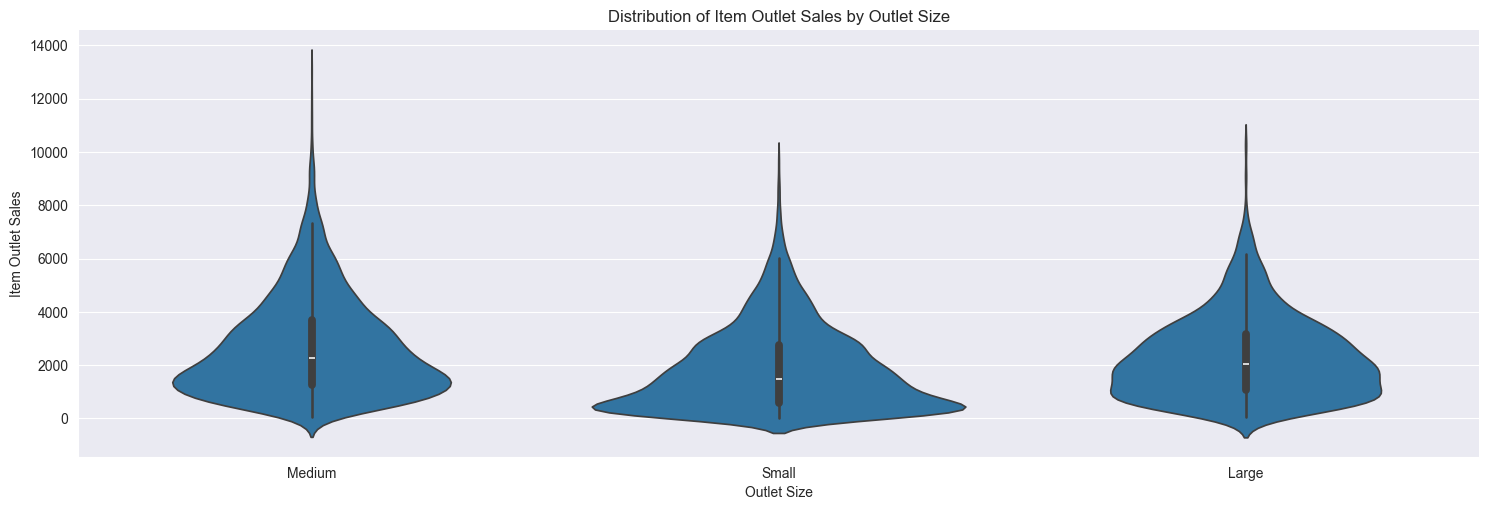

In [337]:
# Outlet_Size vs Item_Outlet_Sales

sns.catplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df, kind='violin', aspect=3)

plt.title('Distribution of Item Outlet Sales by Outlet Size')
plt.xlabel('Outlet Size')
plt.ylabel('Item Outlet Sales')

plt.show()

In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [339]:
num_col = df.select_dtypes(include='number')
num_col

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


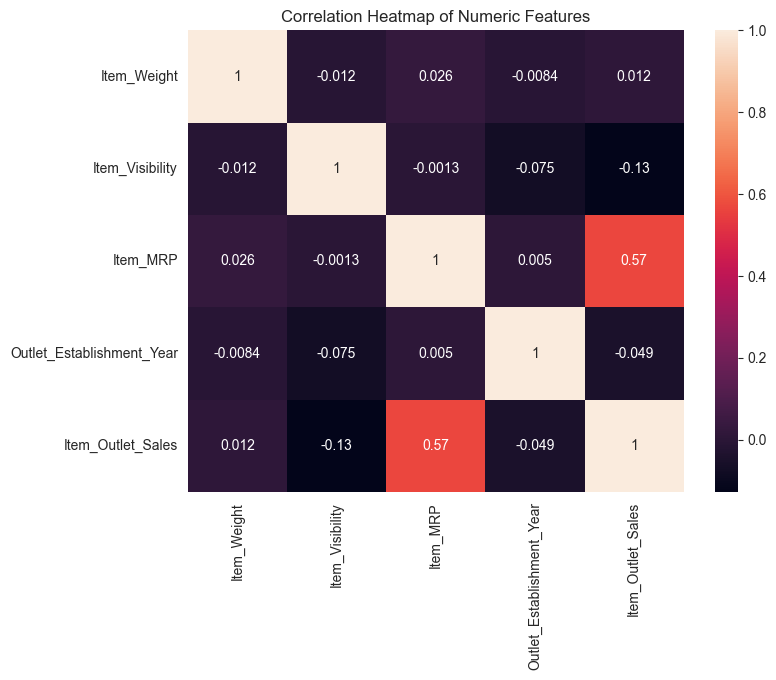

In [340]:
plt.figure(figsize=(8,6))

sns.heatmap(df.corr(numeric_only=True), cbar=True, annot=True)

plt.title('Correlation Heatmap of Numeric Features')

plt.show()